<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lakhs')

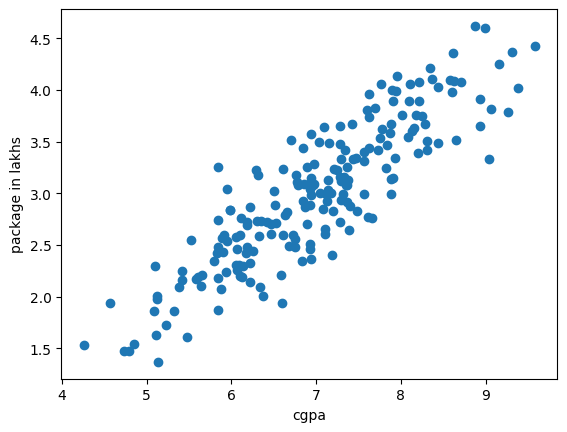

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("cgpa")
plt.ylabel("package in lakhs")

In [22]:
X = df.iloc[:,[0]]
y = df.iloc[:,1]

In [24]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

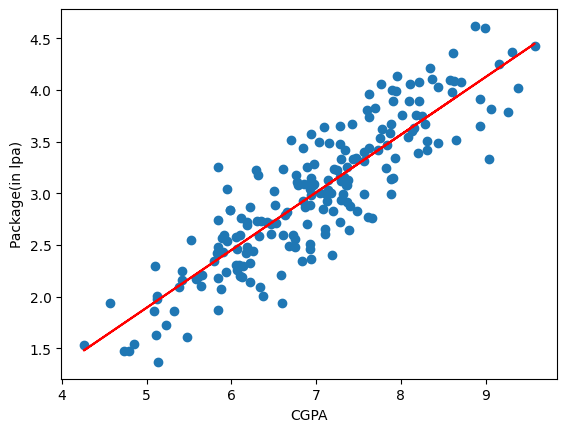

In [29]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
y_pred = lr.predict(X_test)

In [34]:
print(mean_absolute_error(y_pred,y_test))

0.2884710931878175


In [35]:
print(mean_squared_error(y_pred,y_test))

0.12129235313495527


In [36]:
print(r2_score(y_pred,y_test))

0.6626575570753073


In [37]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [40]:
#adjusted r2 score
r2=r2_score(y_pred,y_test)
1 - ((1-r2)*(40-1)/(40-1-1))

0.6537801243667627

In [68]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

#new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,package,random_feature
0,6.89,3.26,0.745787
1,5.12,1.98,0.734393
2,7.82,3.25,0.171931
3,7.42,3.67,0.016677
4,6.94,3.57,0.969470


Text(0, 0.5, 'Package(in lpa)')

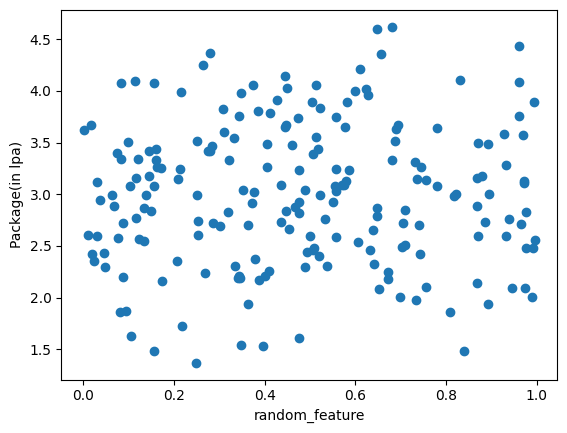

In [69]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [70]:
X = new_df1.iloc[:,[0,2]]
y = new_df1.iloc[:,1]

In [71]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7662349888971167


In [76]:
#adjusted r2 score
r2=r2_score(y_pred,y_test)
1 - ((1-r2)*(40-1)/(40-1-1))

0.6202629122138968

In [84]:
# when unrelevant feature added adjusted r2 score becomes less and r2 score increased.

In [77]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

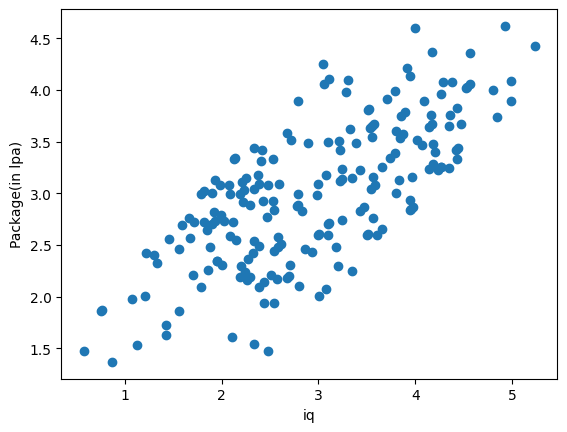

In [78]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [79]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [82]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8303222380054852


In [83]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8211504670868628

In [85]:
# when relevant column added, the r2 score increased very good, adjusted r2 score also increased but not as much as r2 score